In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#loan=pd.read_csv("C:\\Users\\SHIV\\\Downloads\\loan\\loan.csv")
loan = pd.read_csv("C:\\Users\\sanjukta\\Desktop\\DS IN PYTHON\\EDA Case Study\\loan.csv")

C:\Users\sanjukta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.isnull().sum()/len(loan.index)

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

In [4]:
loan=loan.loc[:,round(loan.isnull().sum()/(len(loan.index)),2) < 0.4]

In [5]:
loan['emp_title'] = loan['emp_title'].fillna("Unknown")
loan['desc'] = loan['desc'].fillna("Unknown")

In [6]:
#drop rest of the na records as there percentage is very less
loan = loan.dropna()
#check the summary
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.782300e+04,3.782300e+04,37823.000000,37823.000000,37823.000000,37823.000000,3.782300e+04,37823.000000,37823.000000,37823.000000,...,37823.000000,37823.000000,37823.000000,37823.0,37823.0,37823.0,37823.0,37823.0,37823.000000,37823.0
mean,6.900628e+05,8.598469e+05,11328.891151,11050.996748,10619.465271,327.161001,6.967727e+04,13.377966,0.145811,0.866642,...,94.574677,12.136955,2731.019060,0.0,1.0,0.0,0.0,0.0,0.041456,0.0
std,2.028915e+05,2.542415e+05,7477.323047,7205.152593,7113.100590,209.098263,6.365142e+04,6.655886,0.490534,1.066497,...,690.484884,148.132518,4490.079929,0.0,0.0,0.0,0.0,0.0,0.200272,0.0
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.211055e+05,6.732465e+05,5600.000000,5500.000000,5000.000000,168.750000,4.190200e+04,8.270000,0.000000,0.000000,...,0.000000,0.000000,224.810000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.694130e+05,8.556700e+05,10000.000000,10000.000000,9200.000000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,...,0.000000,0.000000,563.550000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.393200e+05,1.049090e+06,15000.000000,15000.000000,14608.725420,434.750000,8.355000e+04,18.630000,0.000000,1.000000,...,0.000000,0.000000,3402.630000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [7]:
#drop the columns as they have same single value for all
loan=loan.drop(['pymnt_plan','pub_rec','initial_list_status','collections_12_mths_ex_med'],axis=1)
loan=loan.drop(['policy_code','application_type','acc_now_delinq','delinq_amnt'],axis=1)

In [8]:
loan.iloc[:,16:30].head()

,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util
0,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,13648,83.70%
1,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,1687,9.40%
2,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Unknown,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,2956,98.50%
3,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,5598,21%
4,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,27783,53.90%


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 46 columns):
id                          37823 non-null int64
member_id                   37823 non-null int64
loan_amnt                   37823 non-null int64
funded_amnt                 37823 non-null int64
funded_amnt_inv             37823 non-null float64
term                        37823 non-null object
int_rate                    37823 non-null object
installment                 37823 non-null float64
grade                       37823 non-null object
sub_grade                   37823 non-null object
emp_title                   37823 non-null object
emp_length                  37823 non-null object
home_ownership              37823 non-null object
annual_inc                  37823 non-null float64
verification_status         37823 non-null object
issue_d                     37823 non-null object
loan_status                 37823 non-null object
url                         37823 non-null

In [10]:
loan.term = loan.term.astype("category")
loan.grade = loan.grade.astype("category")
loan.sub_grade=loan.grade.astype("category")
loan.home_ownership =loan.home_ownership.astype("category")
loan.verification_status=loan.verification_status.astype("category")
loan.loan_status=loan.loan_status.astype("category")
loan.title = loan.title.astype("category")
loan.addr_state = loan.addr_state.astype("category")
loan['int_rate']=loan['int_rate'].str.split("%",0,expand=True)
loan['int_rate']=loan['int_rate'].astype(float)

In [11]:
#derived metrics
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_year']=loan['issue_d'].dt.year

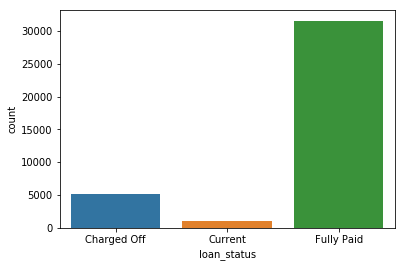

In [12]:
#EDA 
sns.countplot(x="loan_status",data=loan)
plt.show()
#count of fully paid loan status is highest, and current is lowest

In [13]:
round((loan.groupby('loan_status').count()/len(loan.index))*100,2).iloc[0:3,1]
#percentage distribution shows charged off customer are around 14% and fully paid 84%; our objective should be reduce 14%

loan_status
Charged Off    13.75
Current         2.90
Fully Paid     83.35
Name: member_id, dtype: float64

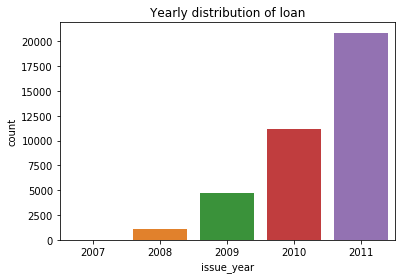

In [14]:
#yearly distribution of loan
sns.countplot(x="issue_year",data=loan)
plt.title("Yearly distribution of loan")
plt.show()
#as year increases number of people to whom loan is given by bank also increases

In [15]:
round((loan.groupby('issue_year').count()/len(loan.index))*100,2).iloc[0:5,1]
#percentage distribution shows there has been increase of 53% in number of applicants for the year 2011

issue_year
2007     0.01
2008     2.92
2009    12.39
2010    29.53
2011    55.14
Name: member_id, dtype: float64

In [16]:
#Types of product offered by lending club
round((loan.groupby('purpose').count()/len(loan.index))*100,2).iloc[0:14,1]
#maximum  loan distributed for the purpose debt consolidation followed by credit card
#minimum loan distrinution for the purpose house,vacation,energy

purpose
car                    3.91
credit_card           12.95
debt_consolidation    47.35
educational            0.77
home_improvement       7.47
house                  0.95
major_purchase         5.51
medical                1.74
moving                 1.45
other                  9.80
renewable_energy       0.25
small_business         4.55
vacation               0.91
wedding                2.40
Name: member_id, dtype: float64

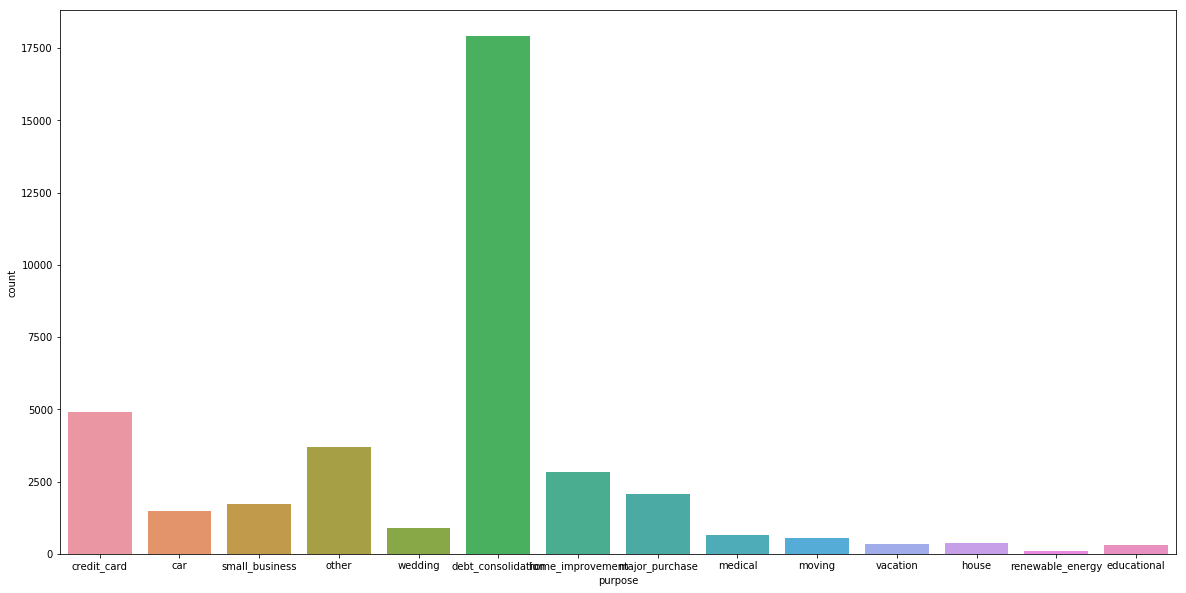

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x="purpose",data=loan)
plt.show()

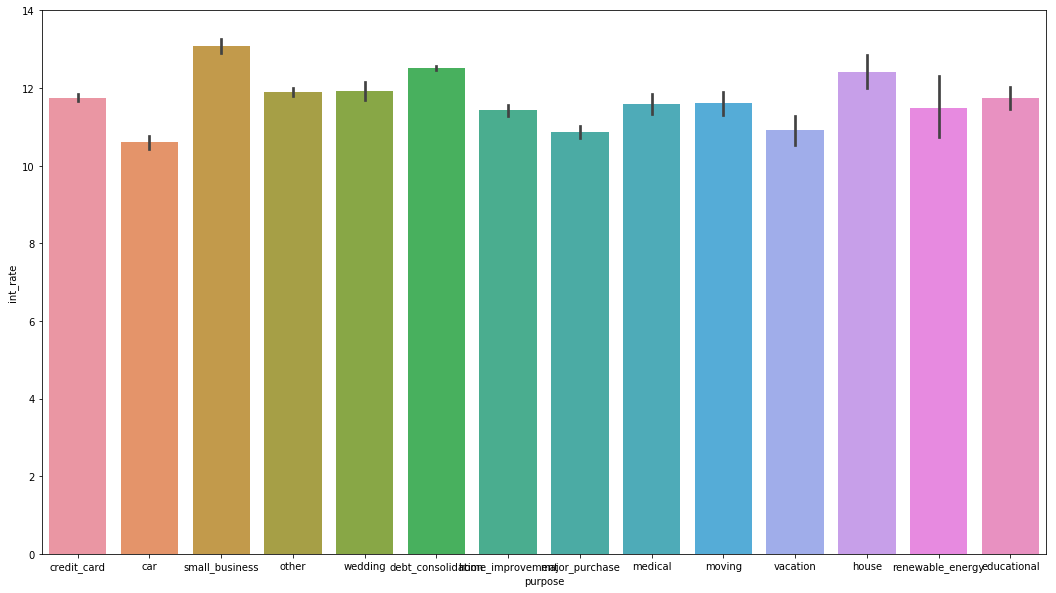

In [18]:
#Default Rates by loan purpose
plt.figure(figsize=(18,10))
sns.barplot(x="purpose",y='int_rate',data=loan)
plt.ylim(0,14)
plt.show()
#small business > 13%
#debt and house - 12.5 and 12.5% approx
#car - 10.5%(looks least)
#credit card and other - 11.5%


<function matplotlib.pyplot.show>

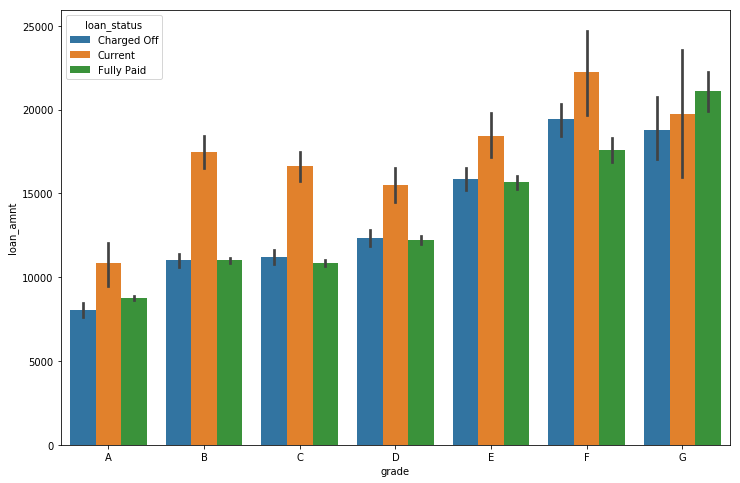

In [21]:
#Plot showing Loan amount v/s Grade across different loan status
plt.figure(figsize=(12,8))
sns.barplot(x="grade",y="loan_amnt",hue="loan_status",data=loan)
plt.show
#for grade G fully paid customers are more in number, for borrower of grade B,C,E,F loan with current status are more 
# defaulters are highest in grade E,F, and G

In [22]:
#plot of loan amount vs experience for different loan status 

plt.figure(figsize=(12,6))
sns.barplot(x="emp_length",y="loan_amnt",hue="loan_status" , data=loan_top4,estimator=np.sum)
plt.ylim(0,20000000)
plt.show()
#among people with 10+ years experience and experience of less than 1 year and 3 years loan amount is highest ; so these experience 
#people tend to take more loans and not able to pay back 
#

NameError: name 'loan_top4' is not defined

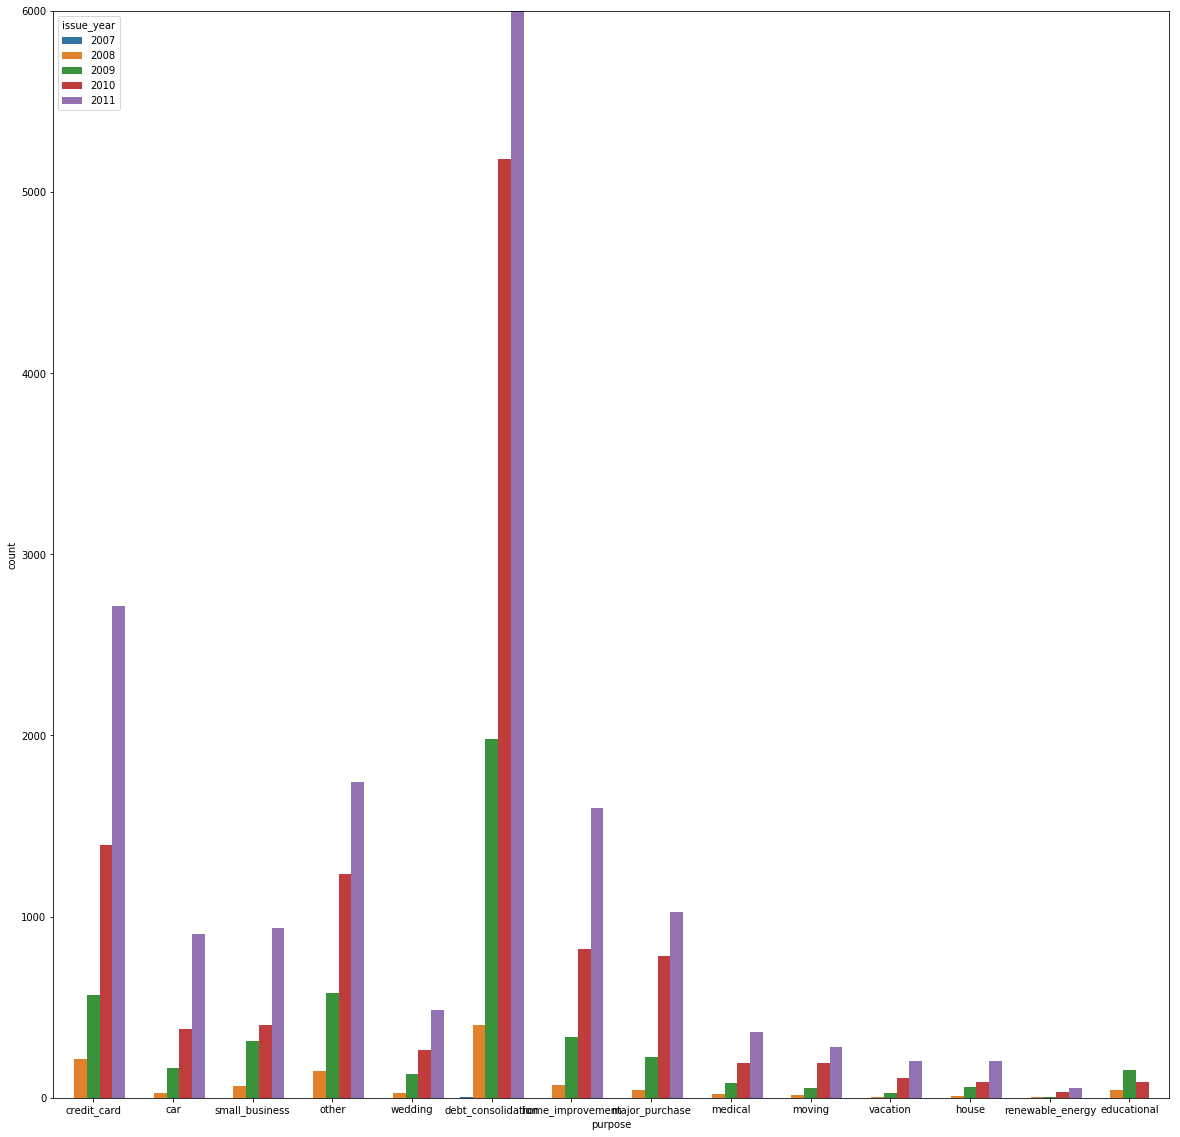

In [23]:
#distribution of loan purpose each year
plt.figure(figsize=(20,20))
sns.countplot(x="purpose",hue="issue_year",data=loan)
plt.ylim(0,6000)
plt.show()

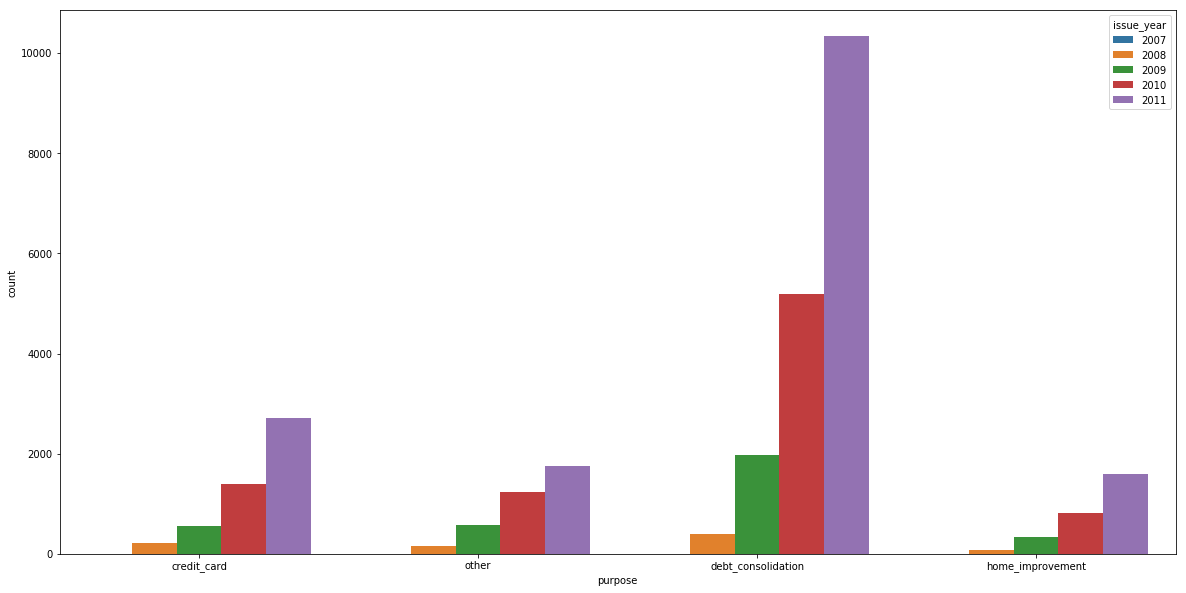

In [24]:
#creating a subset of loan purpose and issue year, purpose = debt,home improvement,credit card,other
loan_purpose1 =loan[loan['purpose'].isin(['debt_consolidation','credit_card','home_improvement','other'])]
#now taking a distribution of the above few categories in loan purpose each year
plt.figure(figsize=(20,10))
sns.countplot(x="purpose",hue="issue_year",data=loan_purpose1)

plt.show()

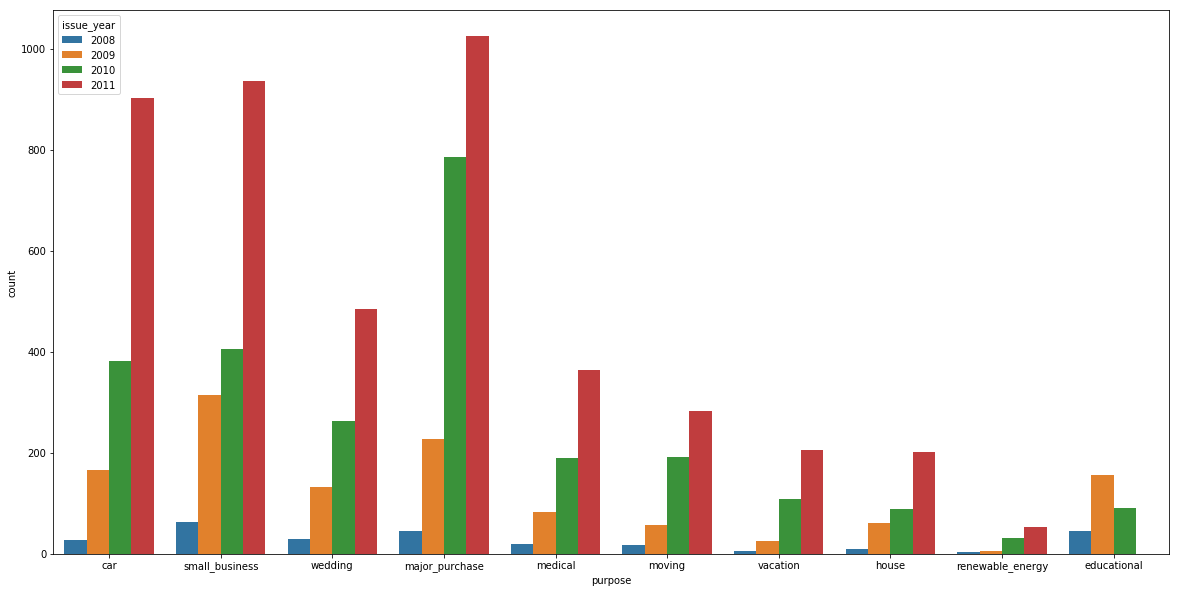

In [25]:
#creating a subset of loan purpose and issue year, purpose other than debt,home improvement,credit card,other
loan_purpose2 =loan[-loan['purpose'].isin(['debt_consolidation','credit_card','home_improvement','other'])]
#now taking a distribution of the above few categories in loan purpose each year
plt.figure(figsize=(20,10))
sns.countplot(x="purpose",hue="issue_year",data=loan_purpose2)
plt.show()

In [26]:
#from the above three plots we can conclude top 4 produucts of lending club for giving loan are 
#Debt consolidation,Credit Card,Major purchase and other
#after major purchase next prodiuct is car, hence i will consider home improvement instead of other
loan_top4 = loan[loan['purpose'].isin(['debt_consolidation','major_purchase','credit_card','home_improvement'])]

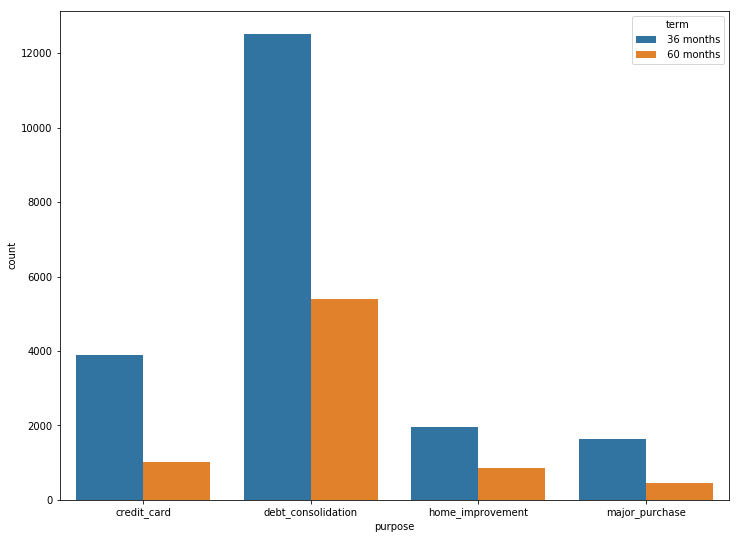

In [27]:
plt.figure(figsize=(12,9))
sns.countplot(x="purpose",hue="term",data=loan_top4)
plt.show()
#for all the top 4 products loan term count is more for 36 mo

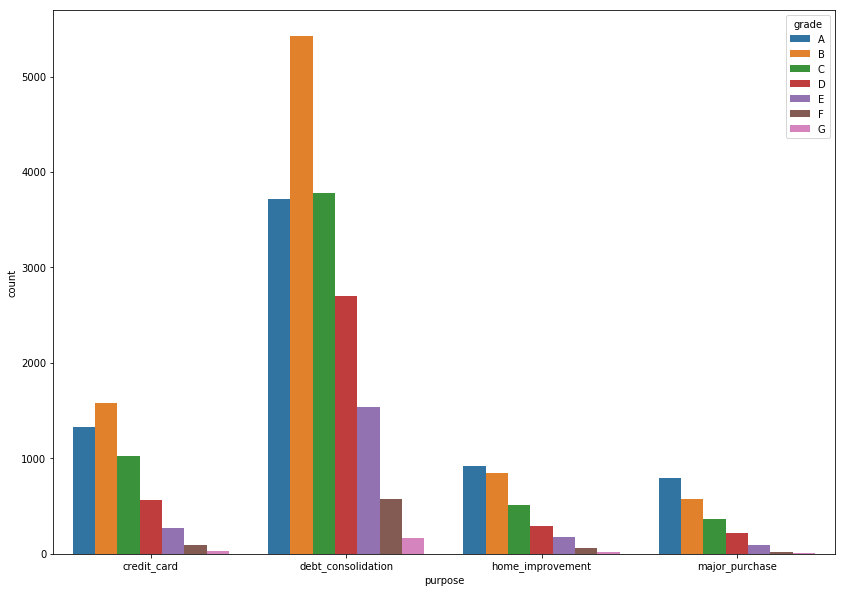

In [28]:
plt.figure(figsize=(14,10))
sns.countplot(x="purpose",hue="grade",data=loan_top4)
plt.show()

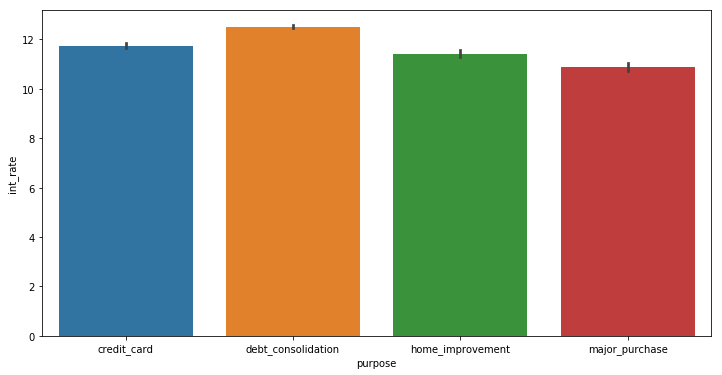

In [29]:
#average interest rate in top 4 products
plt.figure(figsize=(12,6))
sns.barplot(x="purpose",y="int_rate",data=loan_top4,estimator=np.mean)
plt.show()
#average interest rate is highest for debt consolidation, for rest of the top 3 products it is very close

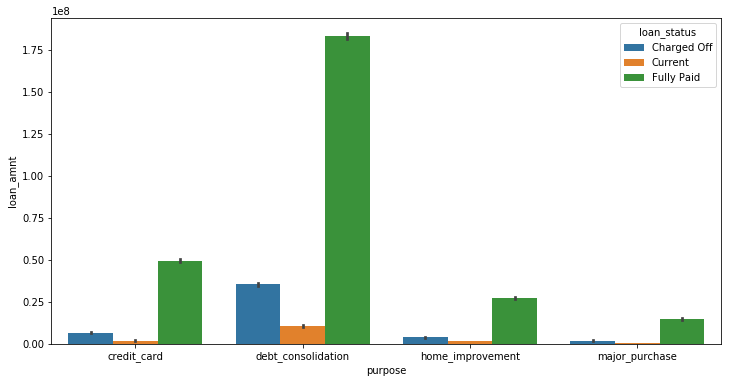

In [30]:
#PLOT OF loan amount vs loan status for all the top 4 products 
plt.figure(figsize=(12,6))
sns.barplot(x="purpose",y="loan_amnt",hue="loan_status" , data=loan_top4,estimator=np.sum)
plt.show()
#defaulters are highest for debt consolidation followed by credit card product when we consider sum of loan status

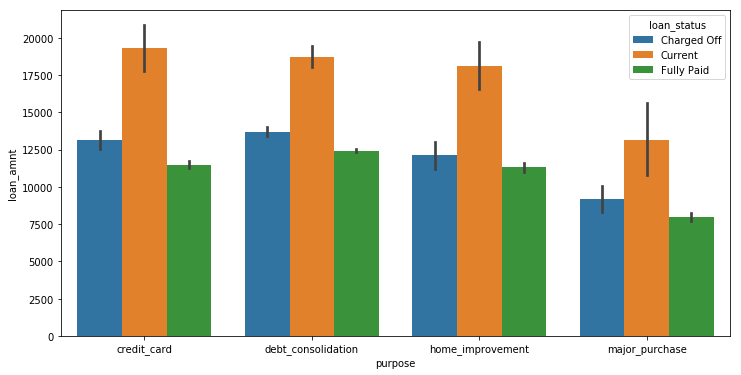

In [31]:
#PLOT OF loan amount vs loan status for all the top 4 products 
plt.figure(figsize=(12,6))
sns.barplot(x="purpose",y="loan_amnt",hue="loan_status" , data=loan_top4,estimator=np.mean)
plt.show()
#defaulters are highest for  credit card product and least for major purchase when we consider mean of loan status

TypeError: __init__() got an unexpected keyword argument 'explode'

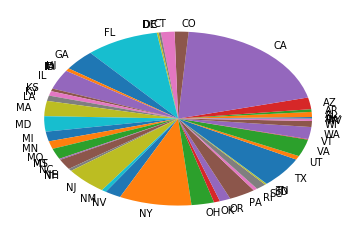

In [37]:
#del(loan_purpose1)
#del(loan_purpose2)
x=loan[loan['loan_status'].isin(["Charged Off"])].groupby('addr_state').count()
a=x.iloc[:,1]

explode = tuple(a)
pie=plt.pie(a,labels=x.index)
plt.legend(pie[0],x.index,loc="upper corner",explode=explode)
plt.show()

In [99]:
list(a)

[15,
 49,
 26,
 113,
 1032,
 87,
 86,
 14,
 11,
 459,
 200,
 28,
 0,
 0,
 189,
 26,
 44,
 52,
 147,
 148,
 94,
 75,
 103,
 2,
 10,
 101,
 0,
 23,
 266,
 29,
 101,
 454,
 142,
 38,
 68,
 166,
 25,
 64,
 11,
 2,
 295,
 37,
 166,
 6,
 116,
 58,
 20,
 3]